## _Titanic Passenger Data Analysis_
#### @sciDelta (Twitter / GitHub)

This model analyses the passenger data from the titanic dataset sourcesd from [OpenML](https://www.openml.org/d/40945). 

Process:

* Data preparation
* Feature analysis and engineering
* Naive Bayes analysis
* 3-Layer Sequential Neural Network analysis
* Closing remarks

#### Libraries & Packages

In [1]:
import numpy as np, pandas as pd, sklearn
import matplotlib.pyplot as plt, seaborn as sb 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense

#### Data Preparation

In [2]:
data = pd.read_csv('titanic.csv')
data.replace('?', np.nan, inplace = True)
data = data.astype({'age':np.float64, 'fare':np.float64})

#### Feature Engineering

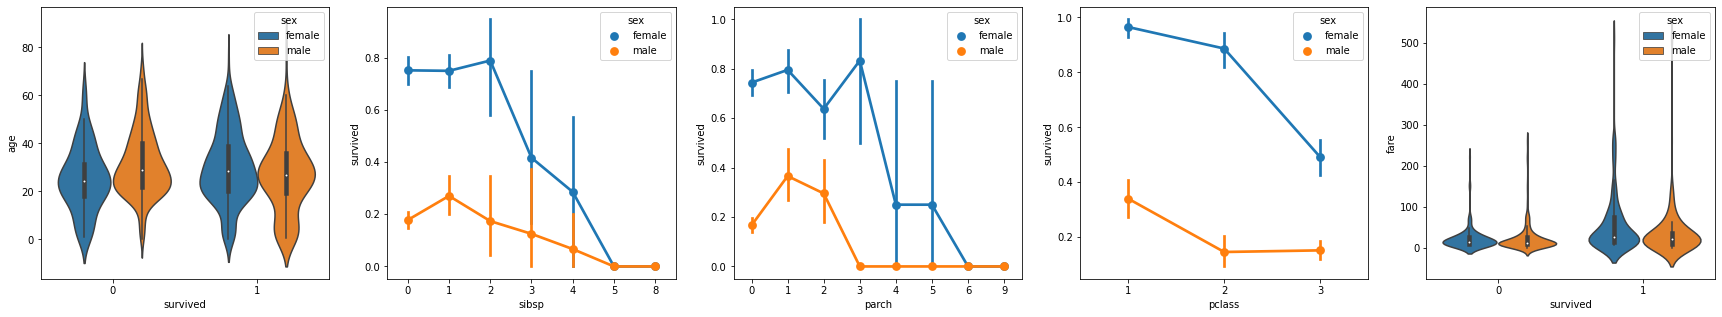

In [3]:
#Visualise Features
fig, axs = plt.subplots(ncols = 5, figsize = (30,5))
sb.violinplot(x = 'survived', y = 'age', hue = 'sex', data = data, ax = axs[0])
sb.pointplot(x = 'sibsp', y = 'survived', hue = 'sex', data = data, ax = axs[1])
sb.pointplot(x = 'parch', y = 'survived', hue = 'sex', data = data, ax = axs[2])
sb.pointplot(x = 'pclass', y = 'survived', hue = 'sex', data = data, ax = axs[3])
sb.violinplot(x = 'survived', y = 'fare', hue = 'sex', data = data, ax = axs[4]);


In [4]:
#Use Pandas to analyse feature correlations

#Convert sex to numwerical features
data.replace({'male': 1, 'female': 0}, inplace = True)

#Analyse correlation of all features 
data.corr().abs()[['survived']]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [5]:
#Group sibsp (siblings or spouse) & parch (parents or children) into relatives feature
data['relatives'] = data.apply(lambda row: int((row['sibsp'] + row['parch']) >0), axis = 1)
data.corr().abs()[['survived']]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [6]:
# Select features for analysis in model
data = data[['sex', 'pclass', 'age', 'relatives', 'fare', 'survived']].dropna()

#### Model training and testing


In [7]:
#Split data for training and testing
x_train, x_test, y_train, y_test = train_test_split(data[['sex', 'pclass', 'age', 'relatives', 'fare']], data.survived, test_size = 0.2, random_state = 0)

#Normalise the data ranges
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [8]:
#Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

#Analyse model performance on test data and model accuracy
predict_test = model.predict(X_test)
print(round(100 * metrics.accuracy_score(y_test, predict_test),2),' % accuracy')

76.08  % accuracy


In [9]:
#Use Neural Net (Sequential) to improve accuracy

model = Sequential()

#Add layers to NN
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


#### Net Notes
* The first layer will be set to have a dimension of 5, since you have 5 inputs: sex, pclass, age, relatives, and fare.
* The last layer must output 1, since you want a 1-dimensional output indicating whether a passenger would survive.
* The middle layer was kept at 5 for simplicity, although that value could have been different
* The rectified linear unit (relu) activation function is a good general function for the first two layers. 
* The sigmoid activation function is required for the output (the probability of a passenger surviving).

To be compiled we need to: 
* Define what type of optimizer will be used. 
* How loss will be calculated. 
* What metric should be optimized for. 

In [10]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 32, epochs = 1000)

Epoch 1/1000
27/27 [==============================] - 0s 949us/step - loss: 0.6924 - accuracy: 0.5778
Epoch 2/1000
27/27 [==============================] - 0s 855us/step - loss: 0.6903 - accuracy: 0.5861
Epoch 3/1000
27/27 [==============================] - 0s 918us/step - loss: 0.6870 - accuracy: 0.5861
Epoch 4/1000
27/27 [==============================] - 0s 843us/step - loss: 0.6804 - accuracy: 0.5909
Epoch 5/1000
27/27 [==============================] - 0s 928us/step - loss: 0.6700 - accuracy: 0.6687
Epoch 6/1000
27/27 [==============================] - 0s 906us/step - loss: 0.6552 - accuracy: 0.7560
Epoch 7/1000
27/27 [==============================] - 0s 889us/step - loss: 0.6351 - accuracy: 0.7727
Epoch 8/1000
27/27 [==============================] - 0s 927us/step - loss: 0.6110 - accuracy: 0.7739
Epoch 9/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5856 - accuracy: 0.7727
Epoch 10/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5607 - 

In [12]:
#Apply test data
y_pred = (model.predict(X_test) > 0.5).astype('int32')
print(round(100 * metrics.accuracy_score(y_test, y_pred),2), ' % accuracy')

80.38  % accuracy


### Closing remarks

* We have imported the Titanic dataset, cleansed it of unuseful data and prepared it for analysis.
* We have investigated the correlation of features, engineered more useful features and normalized the dataset for modelling. 
* Test data was set at 20% for both classification analyses.
* Using the Naive Bayes method we were able to predict the survival of passengers in the test data set at an accuracy of 76%
* Using the Sequential 3-layer Neural Network method we were able to improve the prediction of the survival of passengers in the test data set nearer to 80%.